# CSCA 5632 Final Project

For this project, we will be performing unsupervised machine learning on a dataset of housing prices of residential homes in Ames, Iowa. The goal is to predict the sales prices of each home so these models can be used to predict the price of any other homes that come into the market. Buyers can then use this data to determine if they are able to buy their dream home with the specifications that they have in mind. 

### The Procedure
- Import data from the dataset
- Load and explore the data
- Clean up the data
- Perform Extensive Exploratory Data Analysis (EDA)
- Create models of the data
- Analyze the models and results
- Conclusions on the generated models/results

### Data Source
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. Kaggle. https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview 

### Machine Learning Models
- sklearn.model_selection for splitting the dataset and tuning models
- StandardScaler from sklearn.preprocessing for feature scaling
- sklearn.metrics for evaluating model performance
- Multivariable linear regression, Lasso, and XGB will be the machine learning models used in this project

These models are used to get metrics such as accuracy and mean squared error

### Setup Imports

In [2]:
%pip install seaborn

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

In [4]:
house_train =  pd.read_csv("train.csv")
house_test=  pd.read_csv("test.csv")
sample= pd.read_csv("sample_submission.csv")

### EDA - Exploratory Data Analysis and Data Cleaning

In [50]:
print(house_train.isna().sum())
print(house_train.info())
print(house_test.isna().sum())
print(house_test.info())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1

In [51]:
house_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [52]:
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [53]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Cleaning

In [54]:
print("Houses without alley access: " + str(house_train['Alley'].isna().sum()))

Houses without alley access: 1369


In [55]:
house_train['Alley'] = house_train['Alley'].fillna(value = "No alley access")
house_test['Alley'] = house_test['Alley'].fillna(value = "No alley access")
house_train['Alley'].value_counts()

Alley
No alley access    1369
Grvl                 50
Pave                 41
Name: count, dtype: int64

In [56]:
house_train['PoolQC'] = house_train['PoolQC'].fillna(value ="No Pool")
house_train['Fence'] = house_train['Fence'].fillna(value ="No Fence")
house_train['MiscFeature'] = house_train['MiscFeature'].fillna(value ="None")
house_train['MasVnrType'] = house_train['MasVnrType'].fillna(value = "None")

#test set
house_test['PoolQC'] = house_test['PoolQC'].fillna(value ="No Pool")
house_test['Fence'] = house_test['Fence'].fillna(value ="No Fence")
house_test['MiscFeature'] = house_test['MiscFeature'].fillna(value ="None")
house_test['MasVnrType'] = house_test['MasVnrType'].fillna(value = "None")

In [57]:
colsofinterest = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
house_train[colsofinterest] = house_train[colsofinterest].fillna(value="No Basement")
house_test[colsofinterest] = house_test[colsofinterest].fillna(value="No Basement")

In [58]:
colsofinterestpt2 = ["GarageType", "GarageFinish", "GarageQual" , "GarageCond"]
house_train[colsofinterestpt2] = house_train[colsofinterestpt2].fillna(value="No Garage")
house_test[colsofinterestpt2] = house_test[colsofinterestpt2].fillna(value="No Garage")

For GarageYrBlt (Garage year built), for missing values, we assumed that the year will be the same as the original construction date (YearBuilt)

In [59]:
house_train["GarageYrBlt"] = house_train["GarageYrBlt"].fillna(value=house_train["YearBuilt"])
house_test["GarageYrBlt"] = house_test["GarageYrBlt"].fillna(value=house_train["YearBuilt"])

House lot frontage is not very skewed. We can probably impute missing values as the mean.

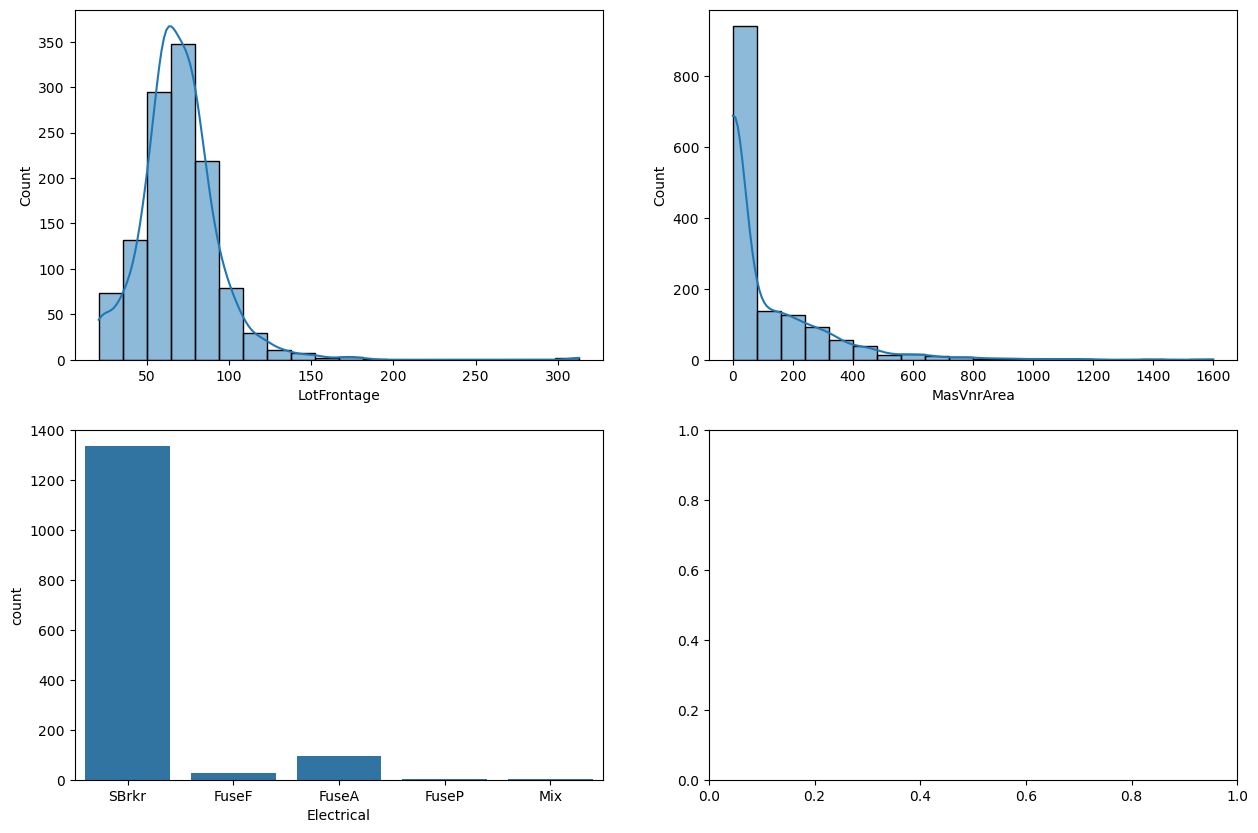

In [60]:
fig, ax = plt.subplots (nrows= 2, ncols = 2, figsize = (15,10))

sns.histplot(data = house_train,ax=ax[0,0], x = "LotFrontage", bins = 20, kde=True)
sns.histplot(data = house_train, ax=ax[0,1], x="MasVnrArea", bins = 20, kde=True)
sns.countplot(data = house_train, ax=ax[1,0], x="Electrical")
plt.show()

In [61]:
house_train["FireplaceQu"] = house_train["FireplaceQu"].fillna(value="No Fireplace")
house_train["Electrical"] = house_train["Electrical"].fillna(value="Standard Circuit Breakers & Romex") # We impute the 1 NA value using the mode.
house_test["Electrical"] = house_test["Electrical"].fillna(value="Standard Circuit Breakers & Romex") # We impute the 1 NA value using the mode.

In [62]:
house_train["LotFrontage"] = house_train["LotFrontage"].fillna(house_train["LotFrontage"].mean())
house_train["MasVnrArea"] = house_train["MasVnrArea"].fillna(house_train["MasVnrArea"].median())


house_test["LotFrontage"] = house_test["LotFrontage"].fillna(house_test["LotFrontage"].mean())
house_test["MasVnrArea"] = house_test["MasVnrArea"].fillna(house_test["MasVnrArea"].median())

In [63]:
#all imputed
print(house_train.info())
print(house_test.info()) # house test dataset still have a few missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

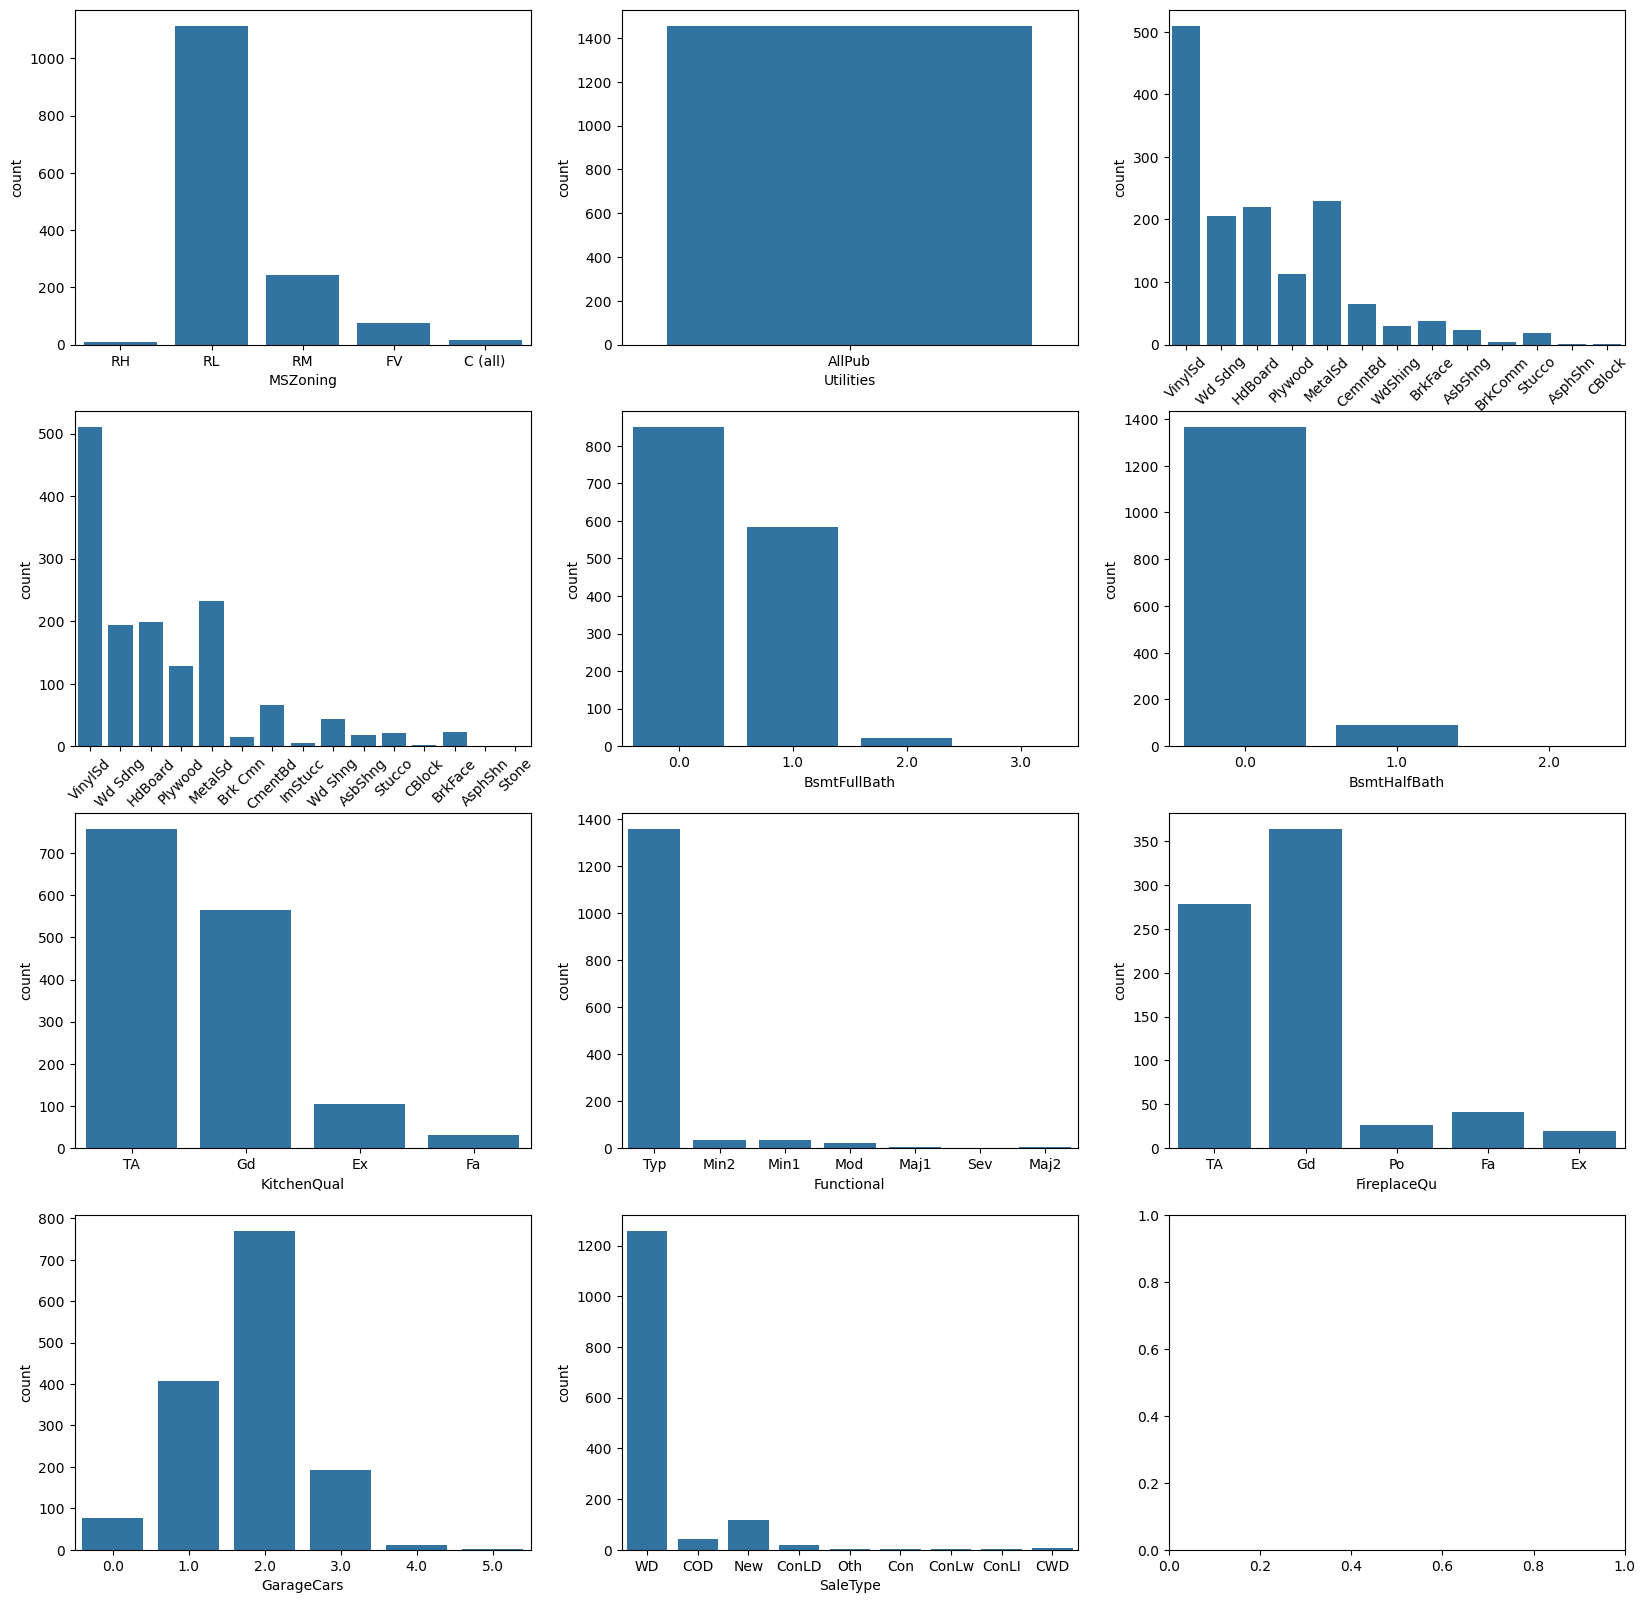

In [64]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

sns.countplot(data=house_test, ax=ax[0, 0], x="MSZoning")
sns.countplot(data=house_test, ax=ax[0, 1], x="Utilities")
sns.countplot(data=house_test, ax=ax[0, 2], x="Exterior1st")
ax[0, 2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
sns.countplot(data=house_test, ax=ax[1, 0], x="Exterior2nd")
ax[1, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
sns.countplot(data=house_test, ax=ax[1, 1], x="BsmtFullBath")
sns.countplot(data=house_test, ax=ax[1, 2], x="BsmtHalfBath")
sns.countplot(data=house_test, ax=ax[2, 0], x="KitchenQual")
sns.countplot(data=house_test, ax=ax[2, 1], x="Functional")
sns.countplot(data=house_test, ax=ax[2, 2], x="FireplaceQu")
sns.countplot(data=house_test, ax=ax[3, 0], x="GarageCars")
sns.countplot(data=house_test, ax=ax[3, 1], x="SaleType")
plt.show()

The missing values from these variables will be imputed with the mode (highest occurrence). Garagecars, BsmtFullBath and BsmtHalfBath will be converted to integer first

In [65]:
colstoimpute = ['MSZoning' , 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageCars', 'SaleType']
for cols in colstoimpute:
    house_test[cols] = house_test[cols].fillna(house_test[cols].mode()[0])

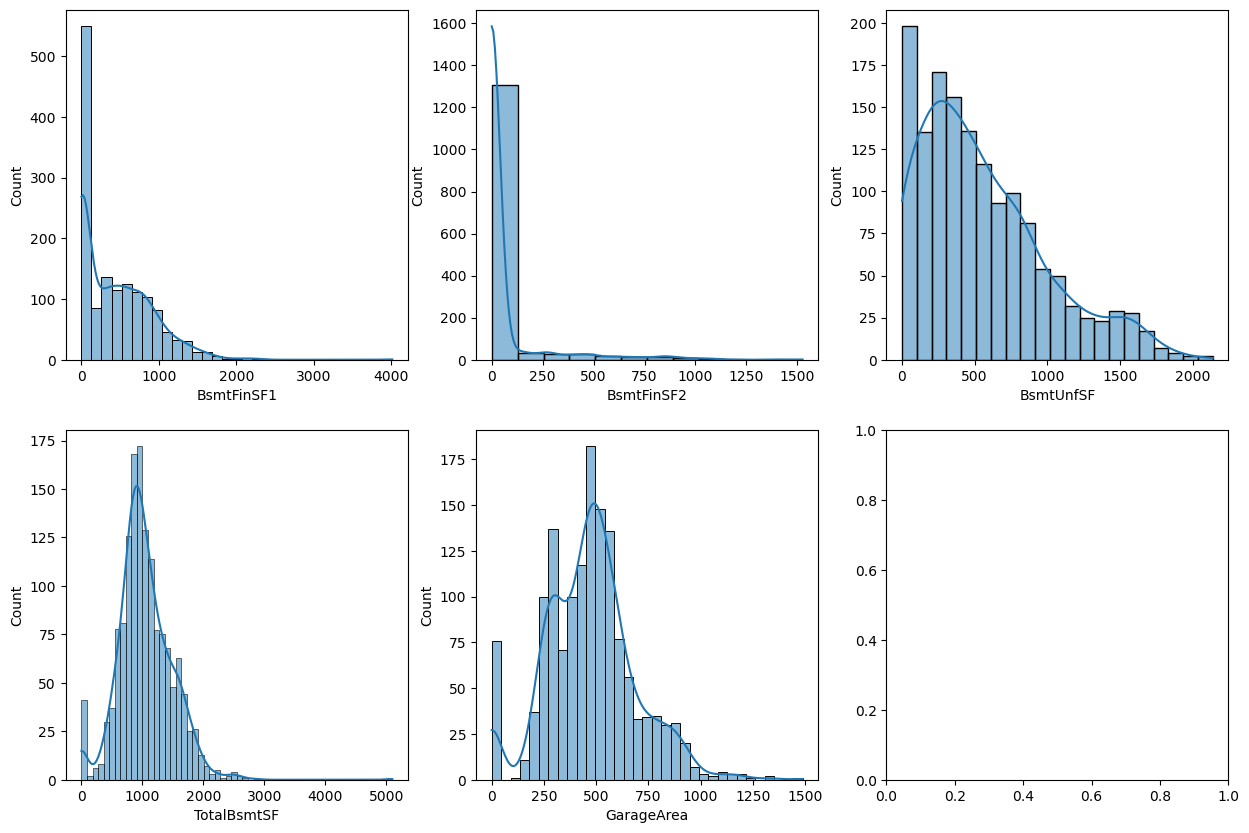

In [66]:
fig, ax = plt.subplots (nrows= 2, ncols = 3, figsize = (15,10))
sns.histplot(data = house_test, ax=ax[0,0], x="BsmtFinSF1", kde=True)
sns.histplot(data = house_test, ax=ax[0,1], x="BsmtFinSF2", kde=True)
sns.histplot(data = house_test, ax=ax[0,2], x="BsmtUnfSF", kde=True)
sns.histplot(data = house_test, ax=ax[1,0], x="TotalBsmtSF", kde=True)
sns.histplot(data = house_test, ax=ax[1,1], x="GarageArea", kde=True)
plt.show()

TotalBsmtSF and GarageArea missing values will be imputed with 0.
While BsmtFinSF1, BsmtFinSF2 and BsmtUnfSF will be imputed with the median values.

In [67]:
colstoimputept2 = ['BsmtFinSF1' , 'BsmtFinSF2', 'BsmtUnfSF']
for cols in colstoimputept2:
    house_test[cols] = house_test[cols].fillna(house_test[cols].median())

colstoimputept3 = ['TotalBsmtSF', 'GarageArea']
house_test[colstoimputept3] = house_test[colstoimputept3].fillna(value = 0)

In [68]:
house_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [69]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [70]:
def remodel(builtyear, remodyear):
    if builtyear == remodyear:
        return "No remodelling"
    else:
        return "Remodelling done"
    
house_train['Remod'] = house_train.apply(lambda row: remodel(row['YearBuilt'], row['YearRemodAdd']), axis=1)
house_train = house_train.drop("YearRemodAdd", axis = 1)

house_test['Remod'] = house_test.apply(lambda row: remodel(row['YearBuilt'], row['YearRemodAdd']), axis=1)
house_test = house_test.drop("YearRemodAdd", axis = 1)

In [71]:
house_test = house_test.drop(columns=['Id'])
house_train = house_train.drop(columns=['Id'])

### Encode categorical features and standardize the data
- LabelEncoder for ordinal relationship
- One hot encoding for binary format

In [72]:
cols_year = ['YearBuilt', 'GarageYrBlt', 'YrSold']
for cols in cols_year:
    house_train[cols] = pd.to_datetime(house_train[cols]).dt.year
    house_test[cols] = pd.to_datetime(house_test[cols]).dt.year

house_train['MoSold'] = pd.to_datetime(house_train['MoSold']).dt.month
house_test['MoSold'] = pd.to_datetime(house_test['MoSold']).dt.month

In [73]:
print(list(house_train.columns))

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeatur

In [74]:
cols_to_label = ['Street','LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond',  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir',
                 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',  'PoolQC', 'Fence', 'Remod']
    
cols_to_hotencode = ['MSSubClass', 'MSZoning', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
                     'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',  
                     'Electrical','PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']

for col in cols_to_label:
    labels = LabelEncoder()
    house_train[col] = labels.fit_transform(house_train[col].astype(str))
    house_test[col] = labels.transform(house_test[col].astype(str))


house_train = pd.get_dummies(house_train, columns=cols_to_hotencode)
house_test = pd.get_dummies(house_test, columns=cols_to_hotencode)

house_train, house_test = house_train.align(house_test, join='left', axis=1, fill_value=0)

In [75]:
house_train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [76]:
print(house_test.shape)
print(house_train.shape)

(1459, 235)
(1460, 235)


In [77]:
house_train['ExterCond'].unique()

array([4, 2, 1, 3, 0])

In [78]:
house_test['ExterCond'].unique()

array([4, 2, 1, 3, 0])

There were a few entries not found in the test dataset. Hence,

In [79]:
X = house_train.drop(["SalePrice"], axis=1)
y = house_train["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
house_test_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model building, Feature Selection.
- Reduce the number of features (currently: 200+ features after encoding), not all are important and we want to avoid overfitting.
- Consider using dimensionality reduction to combine and reduce the number of features which also reduces noise and overall variance.

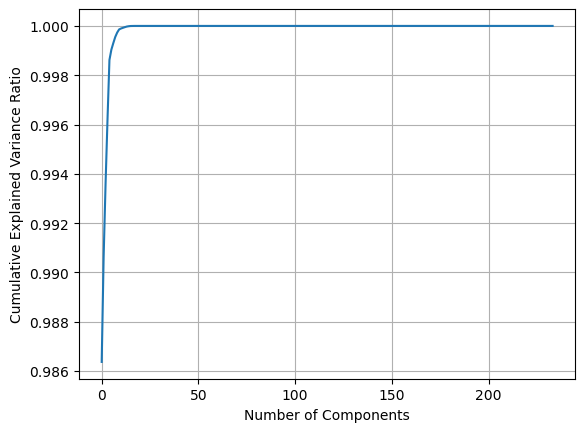

In [80]:
pca = PCA()
pca.fit(X_train)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

Too many components, reduce to 10 to see where is the cut off

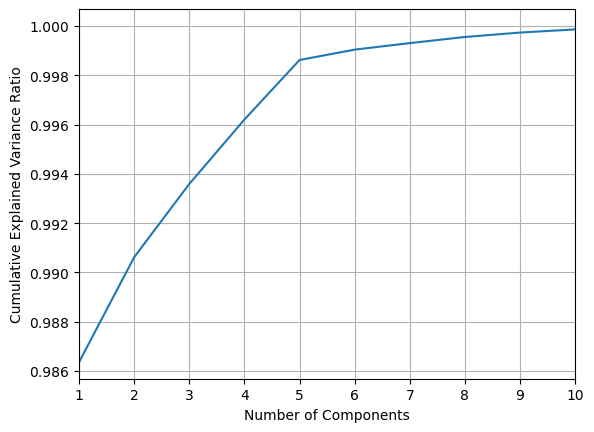

In [81]:
pca = PCA()
pca.fit(X_train)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xlim(1, 10)
plt.grid(True)
plt.show()

5 components seem to be a good cut off

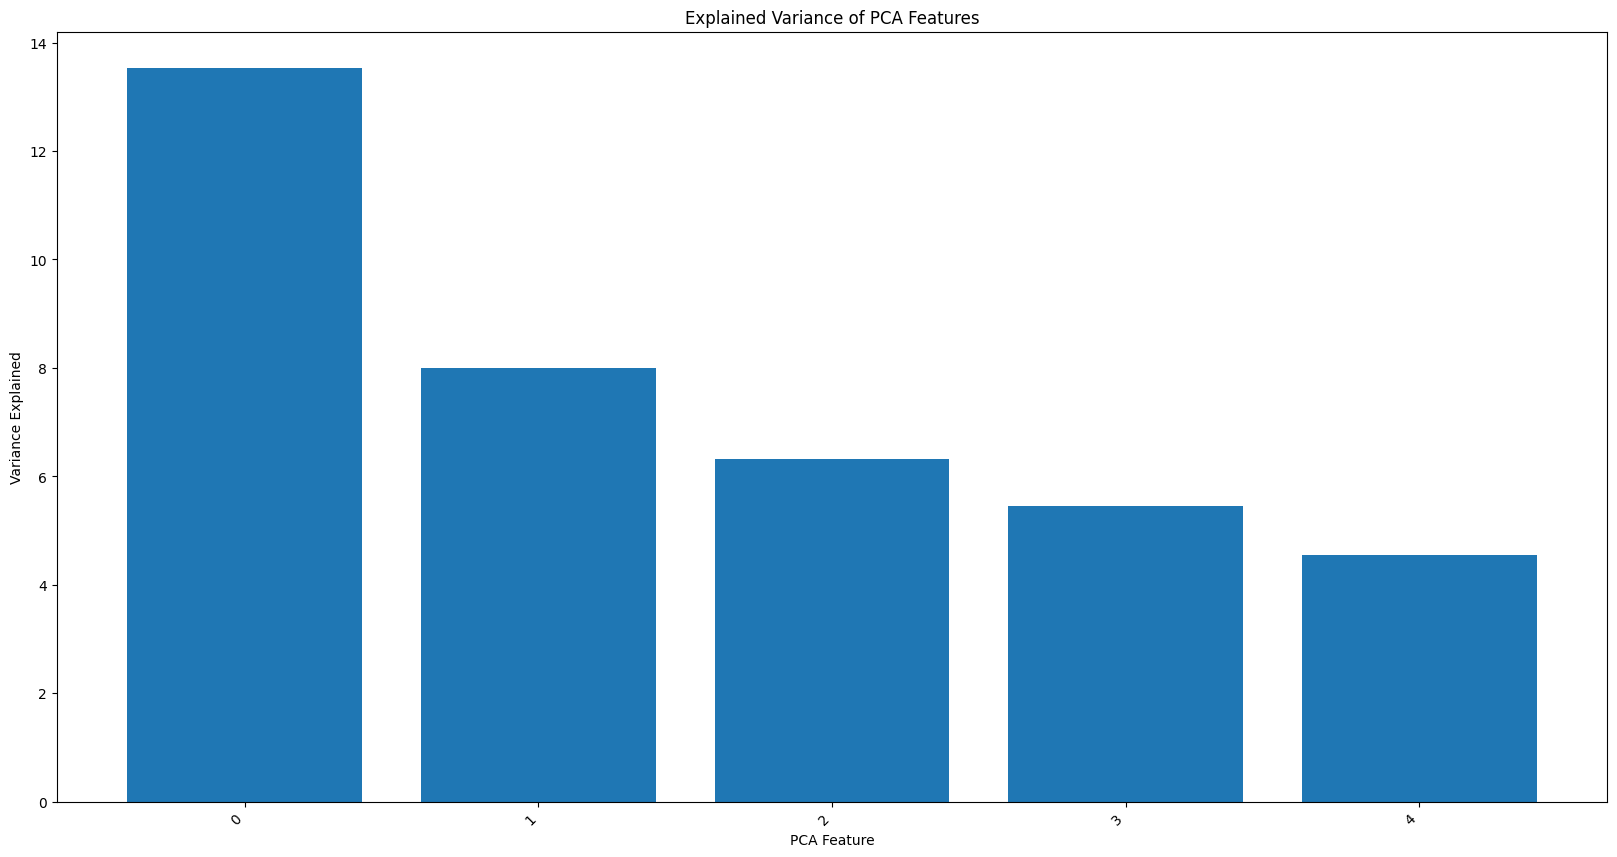

In [82]:
# Apply PCA to the training set, retaining the first 100 principal components 
pca = PCA(n_components=5)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Transform testing data using the same PCA model
features = range(pca.n_components_)


plt.figure(figsize=(20,10))
plt.bar(features, pca.explained_variance_)
plt.xticks(features, rotation=45, ha='right')  # Rotate labels
plt.ylabel('Variance Explained')
plt.xlabel('PCA Feature')
plt.title('Explained Variance of PCA Features')
plt.show()

### Multivariable Linear Regression

In [83]:
lin = LinearRegression()
lin.fit(X_train_pca, y_train)
y_pred = lin.predict(X_test_pca)

r2_lr = r2_score(y_test, y_pred)
print("Rsquare (Linear regression):",r2_lr)
mse_lr = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Linear regression):", mse_lr)
rmse_lr = np.sqrt(mse_lr)
print("Root Mean Squared Error (Linear regression):", rmse_lr)

Rsquare (Linear regression): 0.7773661483925277
Mean Squared Error (Linear regression): 1707674266.591804
Root Mean Squared Error (Linear regression): 41324.015615520766


### Lasso

In [84]:
# Instantiate Lasso model
lasso = Lasso(alpha= 0.001)  # You can adjust the alpha parameter as needed


lasso.fit(X_train_pca, y_train)

y_pred_lasso = lasso.predict(X_test_pca)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("R-squared (Lasso):", r2_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso):", mse_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print("Root Mean Squared Error (Lasso):", rmse_lasso)

R-squared (Lasso): 0.7773661475626842
Mean Squared Error (Lasso): 1707674272.9569747
Root Mean Squared Error (Lasso): 41324.01569253616


### XGBRegressor

In [85]:
xgb = XGBRegressor()
xgb.fit(X_train_pca, y_train)

y_pred_xgb = xgb.predict(X_test_pca)

r2_xgb = r2_score(y_test, y_pred_xgb)
print("R-squared (XGBRegressor):", r2_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error (XGBRegressor):", mse_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print("Root Mean Squared Error (XGBRegressor):", rmse_xgb)

R-squared (XGBRegressor): 0.8643219332975058
Mean Squared Error (XGBRegressor): 1040695030.7686241
Root Mean Squared Error (XGBRegressor): 32259.80518801414


In [86]:
print("R-squared (Linear regression):", r2_lr)
print("R-squared (Lasso):", r2_lasso)
print("R-squared (XGBRegressor):", r2_xgb)

R-squared (Linear regression): 0.7773661483925277
R-squared (Lasso): 0.7773661475626842
R-squared (XGBRegressor): 0.8643219332975058


In [87]:
print("Mean Squared Error (Linear regression):", mse_lr)
print("Mean Squared Error (Lasso):", mse_lasso)
print("Mean Squared Error (XGBoost):", mse_xgb)

Mean Squared Error (Linear regression): 1707674266.591804
Mean Squared Error (Lasso): 1707674272.9569747
Mean Squared Error (XGBoost): 1040695030.7686241


XGBRegressor will be chosen out of the 3.

### Hyperparameter Tuning using RandomizedSearchCV (cross-validation)

In [88]:
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [89]:
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor()
random_search = RandomizedSearchCV(
    param_distributions = parameters,
    estimator = xgb,
    random_state= 666,
    cv =5,
    n_jobs = -1,
    scoring='r2'
)
random_search.fit(X_train_pca, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best Parameters:", best_params)
print("Best Score (r^2):", best_score)

Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best Score (r^2): 0.8240971104941796


In [90]:
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test_pca)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print("R-squared (Best XGBRegressor):", r2_best)
print("Mean Squared Error (Best XGBRegressor):", mse_best)
print("Root Mean Squared Error (Best XGBRegressor):", rmse_best)

R-squared (Best XGBRegressor): 0.8712797469671937
Mean Squared Error (Best XGBRegressor): 987326330.2332922
Root Mean Squared Error (Best XGBRegressor): 31421.749318478312


### Prediction on Test Data

In [91]:
house_test['SalePrice']

0       0
1       0
2       0
3       0
4       0
       ..
1454    0
1455    0
1456    0
1457    0
1458    0
Name: SalePrice, Length: 1459, dtype: int64

In [92]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
house_test= house_test.drop(columns=['SalePrice'])
house_test_scaled = scaler.transform(house_test)

In [93]:
# Apply PCA to the test set
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
house_test_pca = pca.transform(house_test_scaled)

In [94]:
y_pred_xgb_test = best_model.predict(X_test_pca)
r2_xgb_test = r2_score(y_test, y_pred_xgb_test)
print("R-squared (XGBRegressor):", r2_xgb_test)
mse_xgb_test = mean_squared_error(y_test, y_pred_xgb_test)
print("Mean Squared Error (XGBRegressor):", mse_xgb_test)
rmse_xgb_test = np.sqrt(mse_xgb_test)
print("Root Mean Squared Error (XGBRegressor):", rmse_xgb_test)

y_pred_house_test = best_model.predict(house_test_pca)

R-squared (XGBRegressor): 0.869730663307357
Mean Squared Error (XGBRegressor): 999208307.2264624
Root Mean Squared Error (XGBRegressor): 31610.2563612898


In [97]:
house_test_with_id = pd.read_csv('test.csv')

results = house_test_with_id[['Id']].copy()
results['SalePrice'] = y_pred_house_test

print(results.head())

     Id      SalePrice
0  1461  123690.765625
1  1462  166002.453125
2  1463  183195.390625
3  1464  192638.953125
4  1465  172328.718750


The evaluation metrics provided for the three models—Multivariable Linear Regression, Lasso Regression, and XGBRegressor—allow us to analyze their performance based on R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE):

- Multivariable Linear Regression:
R-squared: 0.7774 indicates that the model explains about 77.74% of the variance in the target variable. This is a reasonably good fit but leaves room for improvement.
MSE: 1.71 billion and RMSE: ~41,324 suggest a significant prediction error on the scale of the target variable.
- Lasso Regression:
R-squared: 0.7774 (very close to the linear regression model).
MSE: 1.71 billion and RMSE: ~41,324 are nearly identical to the results of the linear regression model.
Interpretation: Since Lasso adds a penalty for large coefficients, it is likely simplifying the model by reducing coefficients of less important predictors to zero. However, the performance improvement is minimal, suggesting that most predictors in the linear model are already significant.
- XGBRegressor:
R-squared: 0.8643, meaning it explains 86.43% of the variance in the target variable—a substantial improvement over the linear and Lasso models.
MSE: 1.04 billion and RMSE: ~32,260, indicating lower prediction errors compared to the other models.

### Conclusion

- XGBRegressor clearly outperforms the linear regression and Lasso regression in terms of both variance explained (R-squared) and prediction error (MSE, RMSE).
- The close performance between Linear Regression and Lasso suggests that Lasso's regularization does not significantly simplify or improve the model, likely because the data has a strong linear structure or all predictors are relevant.
- XGBRegressor captures more complexity and non-linearity in the data, which significantly boosts its predictive power.
- Use XGBRegressor for the best performance, especially if the goal is predictive accuracy. However, if interpretability is critical, Linear Regression or Lasso might be preferred, though at the cost of reduced accuracy.

With the unsupervised machine learning models, we found that we were able to achieve our goals of predicting other housing listings just from using predicting factors from the machine learning. Some missing features such as LotFrontage, GarageYrBlt, and Alley had some missing data but they were removed for this model training purposes. Features such as SalePrice and LotArea contained outliers that could influence model performance but could be fixed in the future with scaling or transformations. There were strong correlations with features like OverallQual (overall materials and finish quality), GrLivArea(above-ground living area), and TotalBsmtSF(total basement area) which are the biggest predictors of the house prices. Features like GarageArea and GarageCars are strongly correlated but redundant which could affect simpler models like Linear Regression.

With the 1460 observations and 81 features, we were able to train predictive models. With the feature types such as the LotArea, YearBuild, Neighborhood, etc. we were able to use this continuous mix of discrete datasets to ensure that whatever houses are to be put up for sale, we can have potential buyers have a good idea on what the house would cost for their selected features. 
